In [5]:
import requests, time

my_ip = "35.184.55.63" # TODO: put your VM's IP addr here

def nice_get(url):
    print("GET", url)
    r = requests.get(url)
    if r.status_code == 429:
        # told to backoff...
        # we'll wait however long requested, then try once more

        print("Response Headers Dict:", r.headers)

        # TODO: pull "Retry-After" from headers,
        # convert to float, and pass to sleep call:
        sleep_time = float(r.headers["Retry-After"])
        time.sleep(sleep_time)
        r = requests.get(url)
    r.raise_for_status()
    return r.text

def fruit_url(idx):
    return ("http://"+my_ip+":5000"+
            "/fruit?idx=" + str(idx))

def grab_fruits():
    fruits = []
    i = 0
    while True:
        url = fruit_url(i)
        fruit = nice_get(url)
        if fruit != "":
            fruits.append(fruit)
        else:
            return fruits
        i += 1
        
grab_fruits()

GET http://35.184.55.63:5000/fruit?idx=0
GET http://35.184.55.63:5000/fruit?idx=1
Response Headers Dict: {'Retry-After': '1.9960007667541504', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '9', 'Server': 'Werkzeug/1.0.0 Python/3.6.9', 'Date': 'Mon, 23 Mar 2020 20:04:52 GMT'}
GET http://35.184.55.63:5000/fruit?idx=2
Response Headers Dict: {'Retry-After': '1.9944522380828857', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '9', 'Server': 'Werkzeug/1.0.0 Python/3.6.9', 'Date': 'Mon, 23 Mar 2020 20:04:54 GMT'}
GET http://35.184.55.63:5000/fruit?idx=3
Response Headers Dict: {'Retry-After': '1.9957764148712158', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '9', 'Server': 'Werkzeug/1.0.0 Python/3.6.9', 'Date': 'Mon, 23 Mar 2020 20:04:56 GMT'}
GET http://35.184.55.63:5000/fruit?idx=4
Response Headers Dict: {'Retry-After': '1.996253252029419', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '9', 'Server': 'Werkzeug/1.0.0 Python/3.6.9

['apple', 'banana', 'kiwi', 'cantaloupe', 'berries', 'orange']

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame([
    {"x":0.1, "y":0.4},
    {"x":0.2, "y":0.2},
    {"x":0.3, "y":0.1},
    {"x":0.4, "y":0.3}
])
df

,x,y
0,0.1,0.4
1,0.2,0.2
2,0.3,0.1
3,0.4,0.3


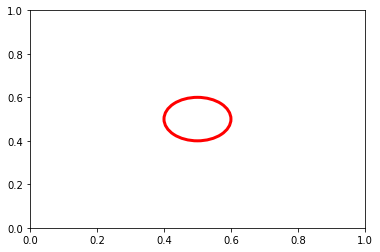

In [16]:
fig, ax = plt.subplots()
p = plt.Circle((0.5, 0.5), 0.1, edgecolor = "r", linewidth = 3, facecolor = "none")
ax.add_artist(p)

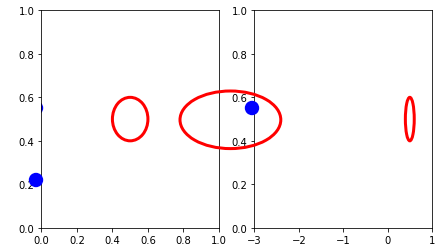

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 4))
ax2.set_xlim(-3, 1)

def rel_circ(area,x,y):
    p = plt.Circle((x, y), 0.1, edgecolor = "r", linewidth = 3, facecolor = "none")
    area.add_artist(p)
def abs_circ(area,x,y):
    p = plt.Circle((x, y), 0.1, facecolor = "b", transform = fig.dpi_scale_trans)
    area.add_artist(p)
rel_circ(ax1, 0.5, 0.5)
rel_circ(ax2, 0.5, 0.5)
rel_circ(fig, 0.5, 0.5)

abs_circ(fig, 0.5, 1)
abs_circ(ax1, 0.5, 2)
abs_circ(ax2, 0.5, 3)

abs_circ(fig, 3.5, 2)

[[1.12159091 1.708     ]
 [1.36818182 1.104     ]
 [1.61477273 0.802     ]
 [1.86136364 1.406     ]]
[[3.83409091 1.708     ]
 [4.32727273 1.104     ]
 [4.82045455 0.802     ]
 [5.31363636 1.406     ]]


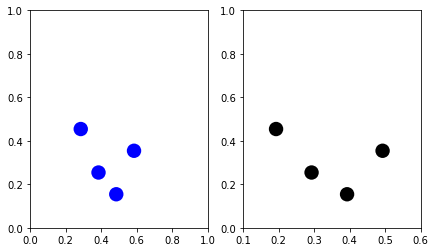

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 4))
ax2.set_xlim(0.1, 0.6)

points1 = ax1.transData.transform(df[["x", "y"]].values) / fig.dpi
print(points1)
points2 = ax2.transData.transform(df[["x", "y"]].values) / fig.dpi
print(points2)
def scatter(ax, points, color):
    for x, y in points:
        p = plt.Circle((x, y), 0.1, facecolor=color,
                       transform=fig.dpi_scale_trans)
        ax.add_artist(p)

scatter(ax1, points1, "blue")
scatter(ax2, points2, "black")